In [319]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [320]:
def f(x):
    return 3*x**2 - 4*x + 5

In [321]:
f(3.0)

20.0

In [322]:
xs  = np.arange(-20, 20, 1)
ys = f(xs)

In [323]:
xs,ys

(array([-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10,  -9,  -8,
         -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5,
          6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
         19]),
 array([1285, 1164, 1049,  940,  837,  740,  649,  564,  485,  412,  345,
         284,  229,  180,  137,  100,   69,   44,   25,   12,    5,    4,
           9,   20,   37,   60,   89,  124,  165,  212,  265,  324,  389,
         460,  537,  620,  709,  804,  905, 1012]))

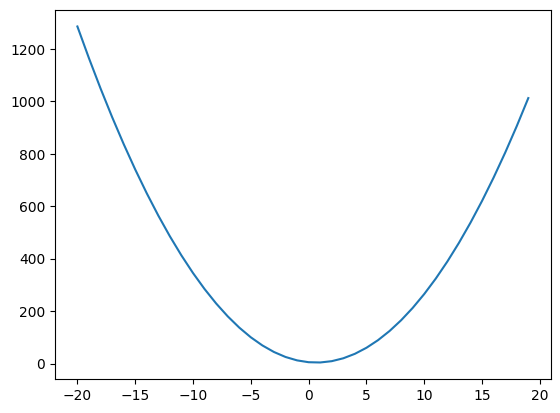

In [324]:
plt.plot(xs, ys)

In [325]:
h = 0.001
x = -3.0
f(x+h) 

43.978003

In [326]:
(f(x+h) - f(x))/h

-21.996999999998934

In [327]:
a = 2.0
b = -3.0
c = 10.0
d = a*b+c
d

4.0

In [328]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a*b+c
d2 = (a+h)*(b)+c
print("d1-",d1,"d2-", d2)
print("slope", (d2-d1)/h)


d1- 4.0 d2- 3.999699999999999
slope -3.000000000010772


In [329]:
class Value:
    def __init__(self, data, _children=() , _op='',label = ''):
        self.data = data
        self._prev = set(_children)
        self._backward = lambda : None
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other),'+')
        def _backward():
            self.grad = 1.0*out.grad
            other.grad = 1.0*out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out =  Value(self.data * other.data , (self, other),'*')
        def _backward():
            self.grad = other.data*out.grad
            other.grad = self.data*out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        n = self.data
        t = (math.exp(2*n)-1)/(math.exp(2*n)+1)
        out = Value(t,(self,),'tanh')
        def _backward():
            self.grad = (1-t**2)*out.grad
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        o.grad = 1.0        
        for node in reversed(topo):
            node._backward()



a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b ; e.label = 'e'
d = e+c;d.label = 'd'
f = Value(-2.0, label='f')
L = d*f;L.label = 'L'


In [330]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    # builds a set of nodes and edges in the graph
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg',graph_attr={'rankdir':'LR'})
    # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph ,create a rectangular node
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f }"%(n.label,n.data , n.grad),shape='record')
        
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
            
    for n1,n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot


l = f*d\
dl/df = d\
dl/dd = f\
dl/de = -2\
dl/da = dl/de * de/da\
e = a*b \
de/da = b = -3\
dl/da = -2 *-3\
dl/db = dl/de * de/db(= a)
      = -2 * 2\

In [331]:
L.grad = 1.0
f.grad = 4.0
d.grad = -2.0
# plus sign routes the gradient to both inputs
e.grad = -2.0
c.grad = -2.0
a.grad = -6.0
b.grad = -4.0

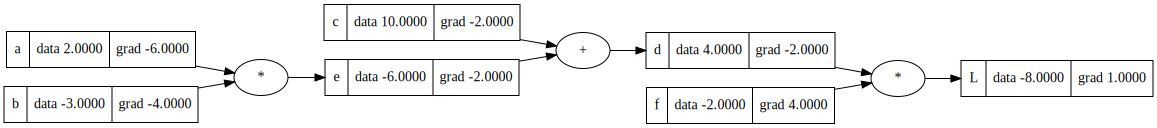

In [332]:
draw_dot(L)

In [333]:
a.data += 0.01*a.grad
b.data += 0.01*b.grad
c.data += 0.01*c.grad
f.data += 0.01*f.grad

e = a+b
d = e+c
L = d*f
L

Value(data=-17.4048)

In [334]:
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b ; e.label = 'e'
    d = e+c;d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f;L.label = 'L'
    L1 = L.data
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    b.data += h
    e = a*b  ; e.label = 'e'
    d = e+c ;d.label = 'd'
    
    f = Value(-2.0, label='f')
    L = d*f;L.label = 'L'
    L2 = L.data
    
    
    print((L2 - L1)/h)
    
lol()

-4.000000000008441


In [335]:
lol()

-4.000000000008441


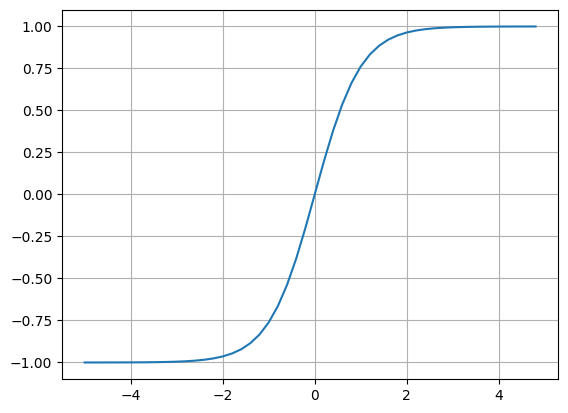

In [336]:
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));plt.grid()

In [337]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# Weights w1,w2
w1 = Value(-3.0 , label='w1')
w2 = Value(1.0 , label='w2')
# bias
b = Value(6.8813 , label='b')

x2w2 = x2*w2 ; x2w2.label = 'x2*w2'
x1w1 = x1*w1 ; x1w1.label = 'x1*w1'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b ; n.label = 'n'
o = n.tanh();o.label = 'o'




In [338]:
# o.grad = 1.0
# n.grad = 0.50
# x1w1x2w2.grad = 0.50
# b.grad = 0.50
# x1w1.grad = 0.5
# x2w2.grad = 0.5
# x1w1 = x1w1
# x2.grad = x2w2.grad* w2.data
# x2.grad = 0.5*1.0
# w2.grad = 0.5*0.0
# x1.grad = 0.5* -3.0
# w1.grad = 0.5*2.0

In [353]:
o.grad = 1.0


In [354]:
# toplogical sort
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo
for node in reversed(topo):
    node._backward()
draw_dot(o)


[Value(data=6.8813),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=0.8813000000000004),
 Value(data=0.7070699857622339)]

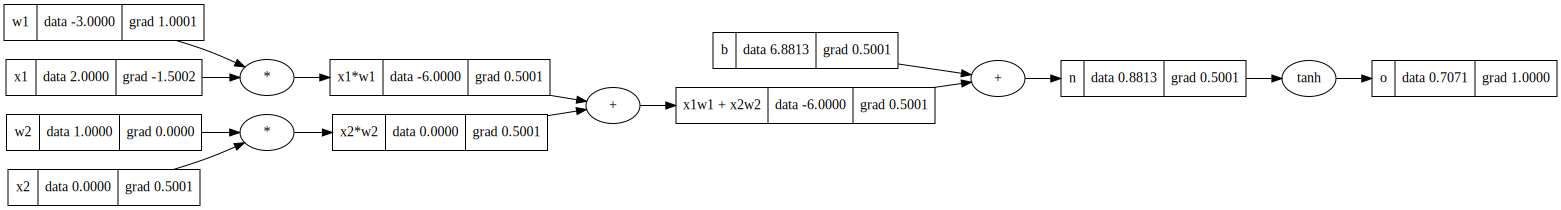

In [350]:
o.grad = 1.0
o._backward()
n._backward()
b._backward()
x1w1x2w2._backward()
x1w1._backward()
x2w2._backward()

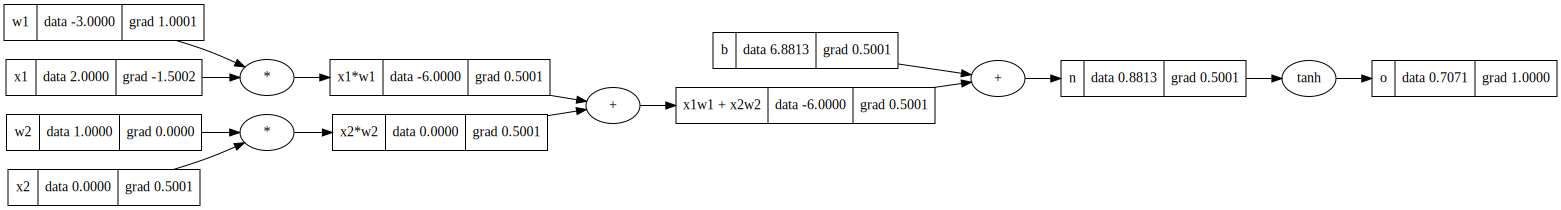

In [351]:
draw_dot(o)


o = tanh
do/dn = 1- o**2


In [341]:
1-o.data**2

0.5000520352341944